# 概要

**任务简介**

赛题以预测二手车的交易价格为任务，数据集报名后可见并可下载，该数据来自某交易平台的二手车交易记录，总数据量超过40w，包含31列变量信息，其中15列为匿名变量。为了保证比赛的公平性，将会从中抽取15万条作为训练集，5万条作为测试集A，5万条作为测试集B，同时会对name、model、brand和regionCode等信息进行脱敏。

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor

# 数据探索

In [204]:
data_train = pd.read_csv('./used_car_train_20200313.csv', sep=' ')
data_train.head(10)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
5,5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,...,0.260246,0.000518,0.119838,0.090922,0.048769,1.885526,-2.721943,2.457660,-0.286973,0.206573
6,6,2402,19990411,13.0,4,0.0,0.0,1.0,150,15.0,...,0.267998,0.117675,0.142334,0.025446,0.028174,-4.902200,1.610616,-0.834605,-1.996117,-0.103180
7,7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,...,0.239506,0.000000,0.122943,0.039839,0.082413,3.693829,-0.245014,-2.192810,0.236728,0.195567
8,8,2974,20030205,19.0,1,2.0,1.0,1.0,179,15.0,...,0.263833,0.116583,0.144255,0.039851,0.024388,-4.925234,1.587796,0.075348,-1.551098,0.069433
9,9,82021,19980101,7.0,7,5.0,0.0,0.0,88,15.0,...,0.262473,0.068267,0.012176,0.010291,0.098727,-1.089584,0.600683,-4.186210,0.198273,-1.025822


In [205]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [206]:
# 变量类型
date_columns = ['creatDate', 'regDate']
useless_columns = ['SaleID', 'name', 'regionCode',]
label_columns = ['price']
categorical_columns = ['brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'seller', 'offerType', 'model']
numeric_columns = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 
                   'v_10', 'v_11', 'v_12','v_13', 'v_14']

In [207]:
data_test = pd.read_csv('./used_car_testB_20200421.csv', sep=' ')
data_test.head(5)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [208]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48496 non-null  float64
 6   fuelType           47076 non-null  float64
 7   gearbox            48032 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

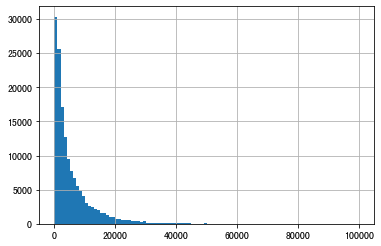

In [209]:
# 标签分布查看
data_train['price'].hist(bins=100)
plt.show()

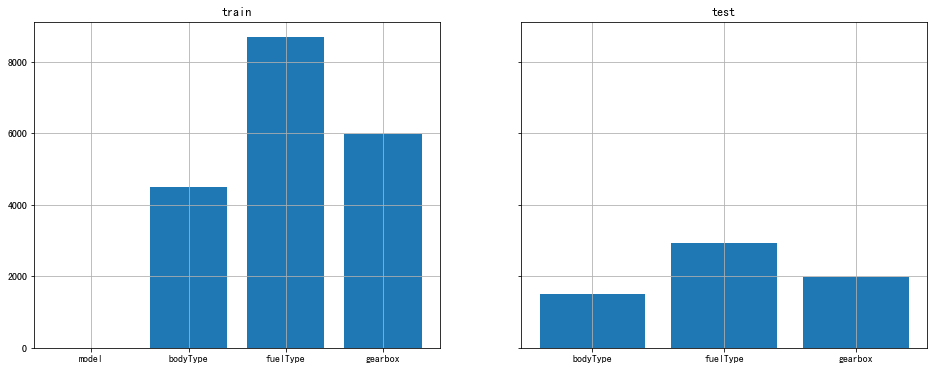

In [210]:
# 缺失值查看
train_null = data_train[data_train.columns[data_train.isnull().sum() != 0]].isnull().sum()
test_null = data_test[data_test.columns[data_test.isnull().sum() != 0]].isnull().sum()
fig, ax = plt.subplots(1, 2, figsize=(16,6), sharey=True)
for idx, (i, j) in enumerate(zip([train_null, test_null], ['train', 'test'])):
    index = [x for x in range(len(i.index))]
    ax[idx].bar(index, i.values)
    ax[idx].set_title(j)
    ax[idx].set_xticks([x for x in range(len(i.index))])
    ax[idx].set_xticklabels(i.index)
    ax[idx].grid()
plt.show()

In [211]:
# 重复值查看
data_train.duplicated().sum()

0

In [212]:
# 非法值查看
print('train', data_train.select_dtypes(include='object').columns.tolist())
print('test', data_test.select_dtypes(include='object').columns.tolist())

train ['notRepairedDamage']
test ['notRepairedDamage']


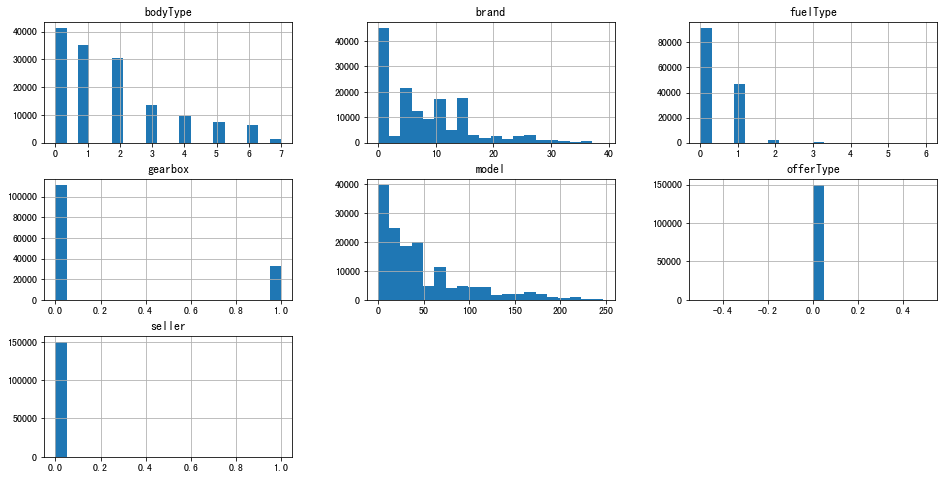

In [213]:
# 离散变量特征分布查看
data_train[categorical_columns].hist(bins=20, figsize=(16, 8))
plt.show()

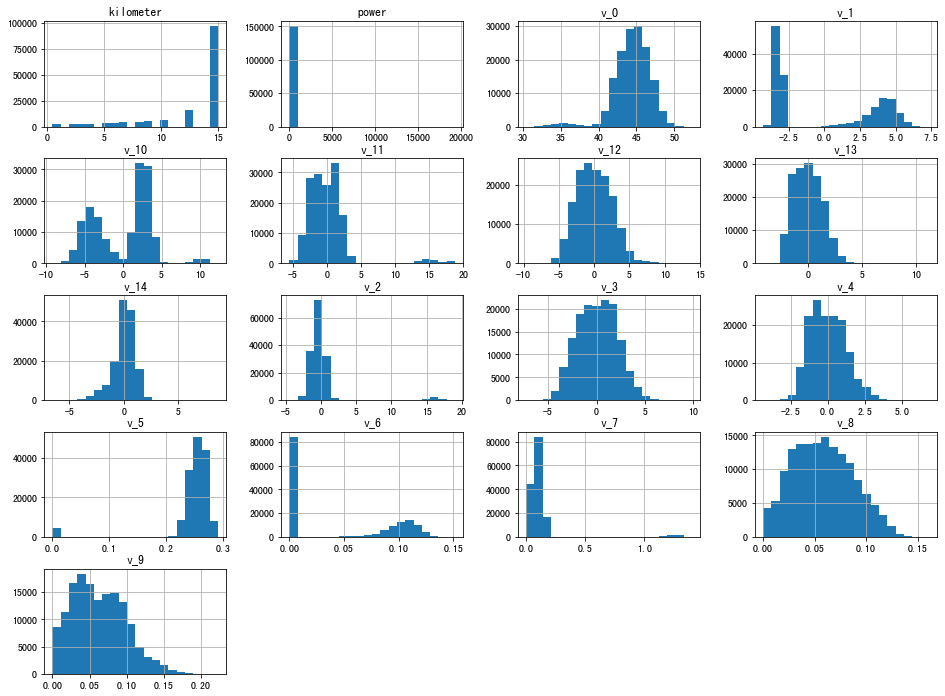

In [214]:
# 连续变量分布查看
data_train[numeric_columns].hist(bins=20, figsize=(16, 12))
plt.show()

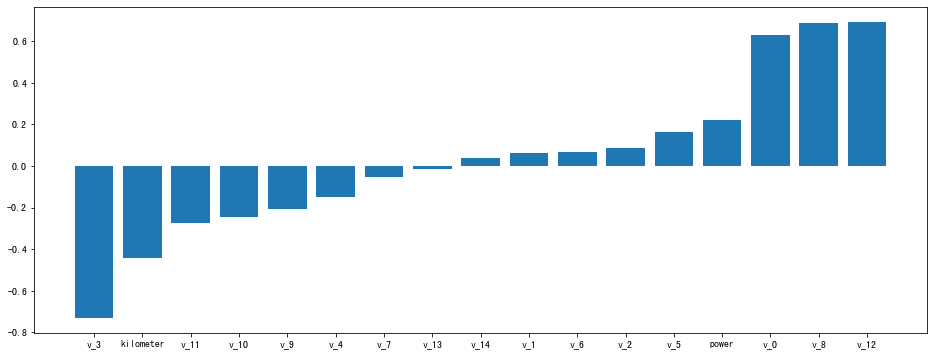

In [215]:
# 连续性变量相关性查看
corr_data = data_train.corrwith(data_train['price'])[numeric_columns].sort_values()
plt.figure(figsize=(16 ,6))
plt.bar(corr_data.index, corr_data.values)
plt.show()

# 数据预处理

In [269]:
# 拷贝一份
features = data_train.copy()
labels = data_train['price'].copy()
features = features[numeric_columns+categorical_columns+date_columns]
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   power              150000 non-null  int64  
 1   kilometer          150000 non-null  float64
 2   v_0                150000 non-null  float64
 3   v_1                150000 non-null  float64
 4   v_2                150000 non-null  float64
 5   v_3                150000 non-null  float64
 6   v_4                150000 non-null  float64
 7   v_5                150000 non-null  float64
 8   v_6                150000 non-null  float64
 9   v_7                150000 non-null  float64
 10  v_8                150000 non-null  float64
 11  v_9                150000 non-null  float64
 12  v_10               150000 non-null  float64
 13  v_11               150000 non-null  float64
 14  v_12               150000 non-null  float64
 15  v_13               150000 non-null  float64
 16  v_

## 可计算处理

In [270]:
# 非法值
features['notRepairedDamage'] = features['notRepairedDamage'].map({'0.0': 0, '1.0': 1,  '-': 0})

# 缺失值(均值、众数补全)
null_columns = ['bodyType', 'fuelType', 'gearbox', 'model']
features.fillna(value={x: features[x].mode().values[0] for x in null_columns}, inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   power              150000 non-null  int64  
 1   kilometer          150000 non-null  float64
 2   v_0                150000 non-null  float64
 3   v_1                150000 non-null  float64
 4   v_2                150000 non-null  float64
 5   v_3                150000 non-null  float64
 6   v_4                150000 non-null  float64
 7   v_5                150000 non-null  float64
 8   v_6                150000 non-null  float64
 9   v_7                150000 non-null  float64
 10  v_8                150000 non-null  float64
 11  v_9                150000 non-null  float64
 12  v_10               150000 non-null  float64
 13  v_11               150000 non-null  float64
 14  v_12               150000 non-null  float64
 15  v_13               150000 non-null  float64
 16  v_

In [271]:
# # 非法值
# features['notRepairedDamage'] = features['notRepairedDamage'].map({'0.0': 0, '1.0': 1,  '-': np.nan})

# # KNN补全
# def knn_fill_na(label_column, features_columns, dataframe, model=None):
#     # 获得特征列
#     knn_features = dataframe[features_columns]
    
#     # knn的训练集测试集索引拆分
#     knn_train_index = knn_labels[~dataframe[column].isnull()].index.tolist()
#     knn_test_index = knn_labels[dataframe[column].isnull()].index.tolist()

#     # 获得训练集的特征和标签，测试集的特征
#     knn_train_features = knn_features.iloc[knn_train_index]
#     knn_train_labels = dataframe.iloc[knn_train_index][column]
#     knn_test_features = knn_features.iloc[knn_test_index]
    
#     if model:
#         # 有model直接预测
#         predict = model.predict(knn_test_features)    
#     else:
#         # 训练并预测空值
#         model = KNeighborsClassifier(n_neighbors=5)
#         model.fit(knn_train_features, knn_train_labels)
#         predict = knn.predict(knn_test_features)

#     return predict, knn_test_index, model

# # 保存KNN模型，预测转换用
# knn_model = {}

# # 执行knn填充
# null_columns = ['bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']
# features_columns = [x for x in features.columns.tolist() if x not in null_columns]
# for column in null_columns:
#     predict, predict_index, model = knn_fill_na(column, features_columns, features, model=None)
#     features.loc[predict_index, column] = predict
#     knn_model[column] = model

## 特征构造

### 人工构造

In [272]:
# 时间特征
features['creatDate'] = pd.to_datetime(features['creatDate'], format='%Y%m%d')
features['regDate'] = features['regDate'].apply(lambda x: str(x))
features['regDate'] = features['regDate'].apply(lambda x: x[:4]+'01'+x[6:] if x[4:6] == '00' else x)
features['regDate'] = pd.to_datetime(features['regDate'], format='%Y%m%d')
features['new_date'] = features['creatDate'] - features['regDate']
features['new_date'] = features['new_date'].apply(lambda x: x.days)
features.drop(date_columns, axis=1, inplace=True)

# offertype 和 seller 样本极端不平衡，选择不要
features.drop(['offerType', 'seller'], axis=1, inplace=True)

In [273]:
# brand字段增加平均值，最大值，最小值，标准差
# for i in ['brand_max', 'brand_min', 'brand_avg', 'brand_std', 'brand_mode']:
#     features[i] = 0

# for brand, brand_groupby in features.groupby('brand'):
#     idx = brand_groupby.index
#     features.loc[idx, 'brand_max'] = labels.iloc[brand_groupby.index].max()
#     features.loc[idx, 'brand_min'] = labels.iloc[brand_groupby.index].min()
#     features.loc[idx, 'brand_avg'] = labels.iloc[brand_groupby.index].mean()
#     features.loc[idx, 'brand_mode'] = labels.iloc[brand_groupby.index].mode()[0]
#     features.loc[idx, 'brand_std'] = labels.iloc[brand_groupby.index].std()
# features.info()

In [274]:
for col in ['model', 'brand']:
    new_col = ['{}_{}'.format(col, x) for x in ['max', 'min', 'avg', 'median']]
    for i in new_col:
        features[i] = 0

    for name, name_groupby in features.groupby(col):
        idx = name_groupby.index
        features.loc[idx, new_col[0]] = labels.iloc[name_groupby.index].max()
        features.loc[idx, new_col[1]] = labels.iloc[name_groupby.index].min()
        features.loc[idx, new_col[2]] = labels.iloc[name_groupby.index].mean()
        features.loc[idx, new_col[3]] = labels.iloc[name_groupby.index].median()
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   power              150000 non-null  int64  
 1   kilometer          150000 non-null  float64
 2   v_0                150000 non-null  float64
 3   v_1                150000 non-null  float64
 4   v_2                150000 non-null  float64
 5   v_3                150000 non-null  float64
 6   v_4                150000 non-null  float64
 7   v_5                150000 non-null  float64
 8   v_6                150000 non-null  float64
 9   v_7                150000 non-null  float64
 10  v_8                150000 non-null  float64
 11  v_9                150000 non-null  float64
 12  v_10               150000 non-null  float64
 13  v_11               150000 non-null  float64
 14  v_12               150000 non-null  float64
 15  v_13               150000 non-null  float64
 16  v_

In [275]:
# 标签取对数
labels = np.log(labels)

### 机器构造

In [18]:
df_onehot = pd.DataFrame()
onehot_columns = list(set(categorical_columns) & set(features.columns.tolist()))
for column in onehot_columns:
    temp_onehot = pd.get_dummies(features[column], prefix=column, prefix_sep='_')
    df_onehot = pd.concat([temp_onehot, df_onehot], axis=1)

features.drop(column, inplace=True, axis=1)

dim = 10
pca = PCA(n_components=dim)
result_pca = pca.fit_transform(df_onehot)

for i in range(dim):
    features_name = 'pca_{}'.format(i)
    features[features_name] = result_pca[:,i]

## 标准化数据

In [276]:
ss = StandardScaler()
ready_features = ss.fit_transform(features)

## 数据集拆分

In [277]:
X_train, X_test, y_train, y_test = train_test_split(ready_features, labels, test_size=0.33, random_state=123)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (100500, 32)
y_train (100500,)
X_test (49500, 32)
y_test (49500,)


# 模型训练

In [283]:
# LR
# reg = LinearRegression()

# GBDT
reg = GradientBoostingRegressor(learning_rate=0.01, n_estimators=200,)

In [284]:
reg.fit(X_train, y_train)
predict = reg.predict(X_test)

# 模型评估

In [285]:
# # 学习曲线
# train_sizes_abs, train_scores, test_scores = learning_curve(lr, X_train, y_train, scoring='neg_mean_absolute_error')
# plt.plot(train_scores.mean(axis=1), label='train')
# plt.plot(test_scores.mean(axis=1), label='test')
# plt.legend()
# plt.grid()
# plt.show()

In [286]:
# 标签反变换
predict = np.exp(predict)
y_test = np.exp(y_test)

# MAE
print('MAE score: {:.2f}'.format(mean_absolute_error(y_test, predict)))

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
df = pd.DataFrame()
df['true'] = y_test
df['predict'] = predict
df['new'] = df['true'] - df['predict']
df.head(20)